In [ ]:
Step 1: Import Libraries
First, import the required libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
Step 2: Load the Dataset
Load your dataset and perform initial exploration.
python

In [9]:
data = pd.read_csv('C:/Users/Tharun/Documents/GEN AI INTERN/ASSIGN 2/cltv_prediction_dataset (1).csv')
print("Initial Data Preview:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

Initial Data Preview:
   CustomerID  Age  Gender  Location  AnnualIncome  PurchaseFrequency  \
0           1   59    Male  Suburban     110630.54               7.84   
1           2   51  Female  Suburban      38454.21               4.99   
2           3   34    Male     Rural      60455.88               5.60   
3           4   50  Female     Urban      89313.75               6.82   
4           5   22  Female  Suburban      59595.81               6.70   

   AverageOrderValue  TotalPurchases  CustomerTenure WebsiteEngagement  \
0             378.18              56               6            Medium   
1             173.80              87               6            Medium   
2             409.52              53               2              High   
3             129.10              97               1               Low   
4              21.55              25               6            Medium   

   CustomerServiceInteractions  MarketingSpend      CLTV  
0                            3     

In [ ]:
Step 3: Handle Missing Values
Identify and handle any missing values in the dataset.

In [17]:
print("\nMissing Values Before Handling:")
print(data.isnull().sum())
data[data.select_dtypes(include=[np.number]).columns] = data.select_dtypes(include=[np.number]).fillna(data.mean(numeric_only=True))
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values Before Handling:
CustomerID                     0
Age                            0
Gender                         0
Location                       0
AnnualIncome                   0
PurchaseFrequency              0
AverageOrderValue              0
TotalPurchases                 0
CustomerTenure                 0
WebsiteEngagement              0
CustomerServiceInteractions    0
MarketingSpend                 0
CLTV                           0
dtype: int64

Missing Values After Handling:
CustomerID                     0
Age                            0
Gender                         0
Location                       0
AnnualIncome                   0
PurchaseFrequency              0
AverageOrderValue              0
TotalPurchases                 0
CustomerTenure                 0
WebsiteEngagement              0
CustomerServiceInteractions    0
MarketingSpend                 0
CLTV                           0
dtype: int64


In [ ]:
Step 4: Encode Categorical Variables
Convert categorical variables into numerical ones using one-hot encoding.
python

In [19]:
data = pd.get_dummies(data, columns=['Gender', 'Location', 'WebsiteEngagement'], drop_first=True)
print("\nData After One-Hot Encoding:")
print(data.head())


Data After One-Hot Encoding:
   CustomerID  Age  AnnualIncome  PurchaseFrequency  AverageOrderValue  \
0           1   59     110630.54               7.84             378.18   
1           2   51      38454.21               4.99             173.80   
2           3   34      60455.88               5.60             409.52   
3           4   50      89313.75               6.82             129.10   
4           5   22      59595.81               6.70              21.55   

   TotalPurchases  CustomerTenure  CustomerServiceInteractions  \
0              56               6                            3   
1              87               6                           10   
2              53               2                            3   
3              97               1                           11   
4              25               6                            7   

   MarketingSpend      CLTV  Gender_Male  Location_Suburban  Location_Urban  \
0         9899.24  39428.86         True         

In [ ]:
Step 5: Feature Engineering
Scale continuous variables and create new features if necessary.
python

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_features = ['Age', 'AnnualIncome', 'PurchaseFrequency', 'AverageOrderValue', 
                       'TotalPurchases', 'CustomerTenure', 'CustomerServiceInteractions', 
                       'MarketingSpend']
data[continuous_features] = scaler.fit_transform(data[continuous_features])
data['AveragePurchaseValue'] = data['TotalPurchases'] / (data['CustomerTenure'] * 12)
print("\nData After Feature Scaling and New Feature Creation:")
print(data.head())


Data After Feature Scaling and New Feature Creation:
   CustomerID       Age  AnnualIncome  PurchaseFrequency  AverageOrderValue  \
0           1  1.029541      0.697961           0.931009           0.853191   
1           2  0.496183     -1.235811          -0.107043          -0.613245   
2           3 -0.637203     -0.646335           0.115136           1.078057   
3           4  0.429513      0.126834           0.559496          -0.933970   
4           5 -1.437240     -0.669379           0.515788          -1.705646   

   TotalPurchases  CustomerTenure  CustomerServiceInteractions  \
0        0.216659        0.387398                    -1.113178   
1        1.305505        0.387398                     0.099359   
2        0.111287       -1.168730                    -1.113178   
3        1.656746       -1.557762                     0.272578   
4       -0.872187        0.387398                    -0.420300   

   MarketingSpend      CLTV  Gender_Male  Location_Suburban  Location_Urba

In [ ]:
Step 6: Split the Dataset
Split the dataset into training and testing sets.

In [23]:
X = data.drop(columns=['CustomerID', 'CLTV'])
y = data['CLTV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set Size: {X_train.shape[0]}, Testing Set Size: {X_test.shape[0]}")


Training Set Size: 4000, Testing Set Size: 1000


In [ ]:
Step 7: Train Different Models
Train various regression models and evaluate their performance.

In [33]:


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='rmse')
}


performance_metrics = []


for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate metrics for each model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    performance_metrics.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R^2': r2
    })


performance_df = pd.DataFrame(performance_metrics)


print(performance_df)

               Model           MAE           MSE       R^2
0  Linear Regression  12740.979151  2.107972e+08 -0.000581
1      Random Forest  12887.913122  2.176415e+08 -0.033068
2  Gradient Boosting  12865.432707  2.158136e+08 -0.024392
3            XGBoost  13056.130076  2.255189e+08 -0.070460


In [ ]:
Step 8: Plot Model Performance Comparison
Visualize the performance of different models using a bar plot.

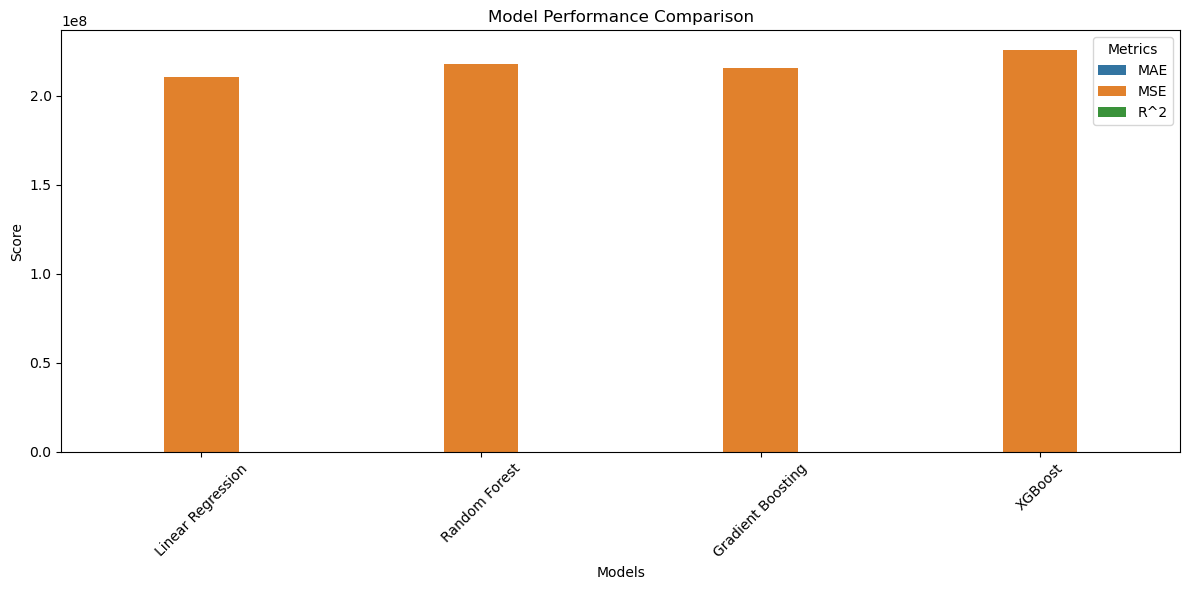

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_df.melt(id_vars='Model', value_vars=['MAE', 'MSE', 'R^2']),
            x='Model', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Step 9: Analyze Feature Importance
Visualize feature importance using the Random Forest model (or any chosen model).

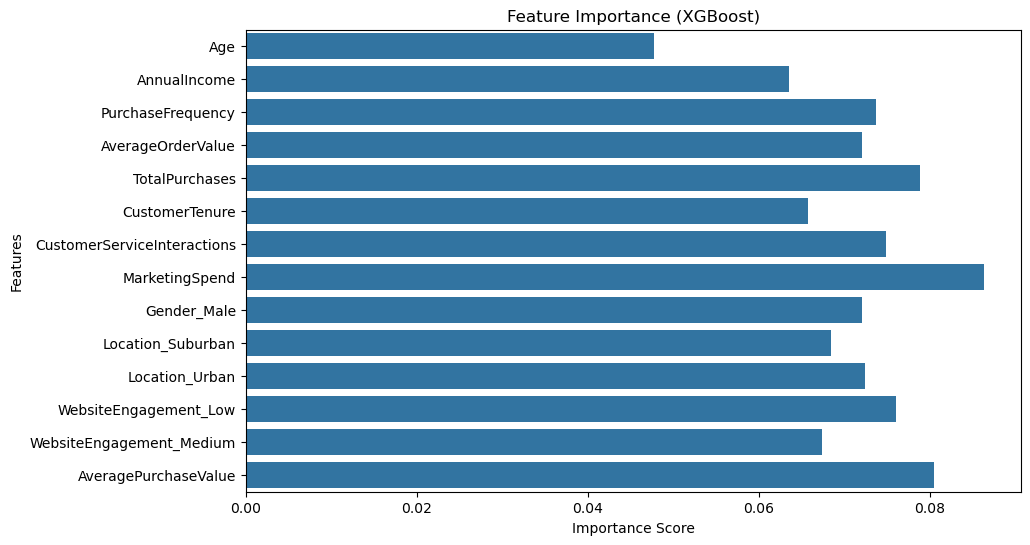

In [43]:
# Assuming 'models' dictionary contains your trained models including XGBoost
feature_importance = models['XGBoost'].feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
Step 10: Actual vs. Predicted Values Plot
Visualize how well the model's predictions match actual CLTV values.

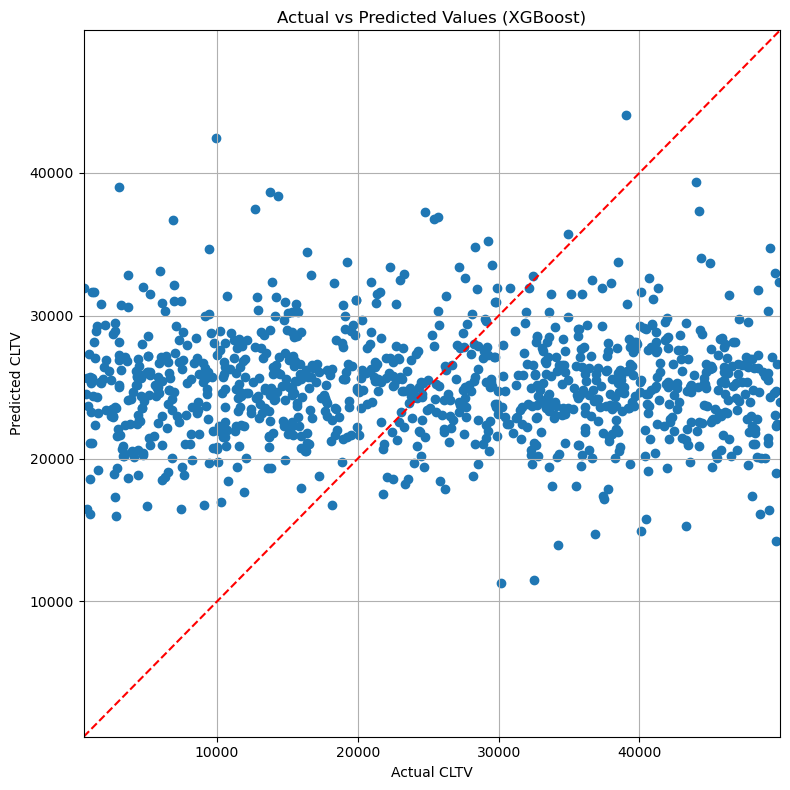

In [41]:

best_model_name = 'XGBoost' 
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
predictions_best = best_model.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions_best)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  
plt.title(f'Actual vs Predicted Values ({best_model_name})')
plt.xlabel('Actual CLTV')
plt.ylabel('Predicted CLTV')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()
plt.tight_layout()
plt.show()
